In [63]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import ta



In [64]:
stk = yf.download('FANUY', start='2023-9-9')
stk.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-11,13.59,13.90,13.59,13.88,13.88,385000
2023-09-12,13.55,13.92,13.55,13.86,13.86,408000
2023-09-13,13.53,13.63,13.53,13.59,13.59,371400
2023-09-14,13.66,13.91,13.66,13.75,13.75,211600
2023-09-15,13.87,13.87,13.53,13.63,13.63,768600


In [65]:
stk['MA20'] = stk['Close'].rolling(20).mean()
stk['MA50'] = stk['Close'].rolling(50).mean()
stk = stk.dropna()
stk.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2023-11-17,13.35,13.42,13.35,13.41,13.41,609200,12.7110,13.0616
2023-11-20,13.45,13.62,13.45,13.59,13.59,327300,12.7605,13.0558
2023-11-21,13.64,13.64,13.39,13.51,13.51,198400,12.8195,13.0488
2023-11-22,13.39,13.66,13.39,13.64,13.64,186900,12.8830,13.0498
2023-11-24,13.67,13.75,13.67,13.74,13.74,160800,12.9650,13.0496


In [66]:
stk = stk[['Adj Close', 'MA20', 'MA50']]

In [67]:
stk

,Adj Close,MA20,MA50
Date,,,
2023-11-17,13.41,12.7110,13.0616
2023-11-20,13.59,12.7605,13.0558
2023-11-21,13.51,12.8195,13.0488
2023-11-22,13.64,12.8830,13.0498
2023-11-24,13.74,12.9650,13.0496
...,...,...,...
2024-06-05,14.08,14.5300,14.3978
2024-06-06,13.91,14.4875,14.3960
2024-06-07,13.75,14.4270,14.3954


In [68]:
Buy = []
Sell = []

for i in range (len(stk)):
    if stk.MA20.iloc[i] > stk.MA50.iloc[i] \
    and stk.MA20.iloc[i-1] < stk.MA50.iloc[i-1]:
        Buy.append(i)
    elif stk.MA20.iloc[i] < stk.MA50.iloc[i-1]\
    and stk.MA20.iloc[i-1] > stk.MA50.iloc[i-1]:
        Sell.append(i)


In [69]:
Buy

[5, 76, 116]

In [70]:
Sell

[56, 102, 139]

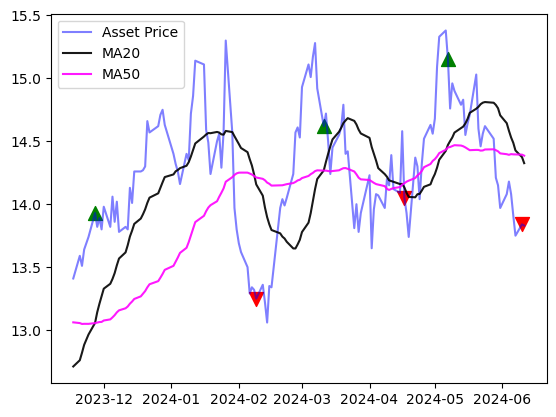

In [71]:
plt.plot(stk['Adj Close'], label= 'Asset Price', c='blue', alpha=0.5)
plt.plot(stk['MA20'], label='MA20', c='Black', alpha=0.9)
plt.plot(stk['MA50'], label='MA50', c='magenta', alpha=0.9)
plt.scatter(stk.iloc[Buy].index, stk.iloc[Buy] ['Adj Close'], marker='^', color='green', s=100)
plt.scatter(stk.iloc[Sell].index, stk.iloc[Sell] ['Adj Close'], marker='v', color='red', s=100)
plt.legend()
plt.show()

In [49]:
df = yf.download('FANUY', start='2024-04-18', interval='30m')

[*********************100%%**********************]  1 of 1 completed


In [50]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-18 09:30:00,13.7601,13.990,13.7600,13.920,13.920,2757
2024-04-18 10:00:00,13.9150,13.965,13.9150,13.955,13.955,19178
2024-04-18 10:30:00,13.9529,14.000,13.9529,13.998,13.998,5473
2024-04-18 11:00:00,13.9900,14.000,13.9700,13.995,13.995,18659
2024-04-18 11:30:00,13.9829,13.985,13.9600,13.975,13.975,29293
...,...,...,...,...,...,...
2024-06-07 11:00:00,13.7600,13.760,13.7600,13.760,13.760,400
2024-06-07 13:00:00,13.7500,13.750,13.7500,13.750,13.750,200
2024-06-07 14:00:00,13.7400,13.740,13.7400,13.740,13.740,2280


In [73]:
df['%K'] = ta.momentum.stoch(df.High,df.Low,df.Close, window=14, smooth_window=3)

In [74]:
df['%D'] = df['%K'].rolling(3).mean()

In [75]:
df['rsi'] = ta.momentum.rsi(df.Close, window=14)

In [76]:
df['macd'] = ta.trend.macd_diff(df.Close)

In [77]:
df.dropna(inplace=True)

In [82]:
dfx = pd.DataFrame()
for i in range(1,4):
    mask = (df['%K'].shift(i) < 20) & (df['%D'].shift(i) < 20)
    dfx = dfx._append(mask, ignore_index=True)

In [83]:
dfx

Datetime,2024-04-25 10:00:00,2024-04-25 10:30:00,2024-04-25 11:00:00,2024-04-25 11:30:00,2024-04-25 12:00:00,2024-04-25 12:30:00,2024-04-25 13:00:00,2024-04-25 13:30:00,2024-04-25 14:00:00,2024-04-25 14:30:00,...,2024-06-06 12:30:00,2024-06-06 13:30:00,2024-06-06 15:30:00,2024-06-07 09:30:00,2024-06-07 10:30:00,2024-06-07 11:00:00,2024-06-07 13:00:00,2024-06-07 14:00:00,2024-06-07 14:30:00,2024-06-07 15:00:00
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,True,True,True,True,True
